# Story 6 : What Is The State of Food Security and Nutrition in the US

The United Nations Food and Agriculture Organization publication, The State of Food Security and Nutrition in the World 2022 (https://www.fao.org/documents/card/en/c/cc0639en) might lead one to the conclusion that it's an elsewhere problem. That the people who are suffering malnutrition and starvation are "elsewhere", not in our backyard. For this assignment you will need to take a closer look here at home (the US). Are US children suffering these plights?

Notes:

You may use ANY graphical package that you find useful including PowerBI, Tableau, etc.
You will need to locate and source data that reflects food security and nutrition by state broken down by men, women, children and by age groups.
Your analysis should demonstrate correlations that exist between level of poverty and food insecurity, malnutrition and starvation.
Your data and analysis should also indicate what happens to the children as they mature into adults. Will they become fully functional citizens or will they require continued support?
Your data visualizations need to tell the story for a U.S. Senator that you were lobbying to address the issue of food insecurity in the US.

- https://www.census.gov/data/datasets/time-series/demo/cps/cps-supp_cps-repwgt/cps-food-security.html#cpssupps 
- https://www.ers.usda.gov/data-products/food-security-in-the-united-states/

In [1]:
# load packages
import numpy as np # need to downgrade this packages pip install numpy==1.26.4  pyyaml
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import geopandas as gpd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

/Users/eddiexuexia/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Preparation

In [2]:
cps_data_url = 'https://raw.githubusercontent.com/eddiexunyc/food_security_us/refs/heads/main/Resources/cps_data.csv'
cps_data = pd.read_csv(cps_data_url)
cps_data = cps_data.loc[cps_data['food_security_status'] != '-1']
cps_data = cps_data.loc[cps_data['food_security_status'] != '-9']

The data needs to be cleansed before data mutation

In [14]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands, U.S.": "VI",
}

In [ ]:




# create a function for age group
def age_group(x):
    if x < 13:
        return 'child'
    elif 13 <= x < 17:
        return 'teenager'
    elif 17 <= x <= 62:
        return 'adult'
    else:
        return 'senior'
    
cps_data_revised = cps_data.loc[cps_data['age'] != -1].drop(['Unnamed: 0'], axis=1)
cps_data_revised['age_group'] = cps_data_revised['age'].apply(age_group)

cps_data_revised

,household_id,household_id_2,age,sex,education,race,hispanic,family_income,household_size,housing_tenure,...,usual_weekly_food_spending,received_snap,received_school_lunch,received_school_breakfast,received_wic,person_supplement_weight,household_supplement_weight,state,poverty_indicator,age_group
0,70061014511774,16011,43,Female,Masters_degree,2,Non-Hispanic,"$75,000 to $99,999",5,Rented,...,280,-1,-1,-1,-1,3267.0314,3267.0314,Alabama,0,adult
1,70061014511774,16011,44,Male,High_school_graduate_diploma_or_GED,2,Non-Hispanic,"$75,000 to $99,999",5,Rented,...,280,-1,-1,-1,-1,3227.4523,3267.0314,Alabama,0,adult
2,70061014511774,16011,13,Female,Not_relevant,2,Non-Hispanic,"$75,000 to $99,999",5,Rented,...,280,-1,-1,-1,-1,4634.0388,3267.0314,Alabama,0,teenager
3,70061014511774,16011,15,Female,9th_grade,2,Non-Hispanic,"$75,000 to $99,999",5,Rented,...,280,-1,-1,-1,-1,5084.4886,3267.0314,Alabama,0,teenager
4,70061014511774,16011,20,Female,High_school_graduate_diploma_or_GED,2,Non-Hispanic,"$75,000 to $99,999",5,Rented,...,280,-1,-1,-1,-1,5443.0958,3267.0314,Alabama,0,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126806,655340013741005,15111,49,Female,Some_college_no_degree,1,Non-Hispanic,"$75,000 to $99,999",2,Owned/Being Bought,...,300,-1,-1,-1,-1,654.9122,654.9122,Wyoming,0,adult
126807,655340013741005,15111,54,Male,Some_college_no_degree,1,Non-Hispanic,"$75,000 to $99,999",2,Owned/Being Bought,...,300,-1,-1,-1,-1,637.8705,654.9122,Wyoming,0,adult
126809,655360677191105,15111,51,Male,High_school_graduate_diploma_or_GED,1,Non-Hispanic,"$30,000 to $34,999",1,Owned/Being Bought,...,110,No,-1,-1,-1,442.6095,442.6095,Wyoming,1,adult
126812,655907114899590,16111,52,Male,High_school_graduate_diploma_or_GED,1,Non-Hispanic,"$100,000 to $149,999",2,Owned/Being Bought,...,100,-1,-1,-1,-1,472.5786,383.4010,Wyoming,0,adult


### Low and Very Low Food Security

In [4]:
# low food security data
low_food_security_data = cps_data_revised[cps_data_revised['food_security_status'] != 'Food Secure']
low_food_security_data = low_food_security_data[low_food_security_data['poverty_indicator'] == 1]
low_food_security_count = low_food_security_data.groupby(['state'])['poverty_indicator'].count().reset_index(name='poverty_count')
low_food_security_count

,state,poverty_count
0,Alabama,121
1,Alaska,94
2,Arizona,88
3,Arkansas,220
4,California,730
5,Colorado,68
6,Connecticut,57
7,Delaware,62
8,District of Columbia,43
9,Florida,278


### Child Food Security

In [5]:
child_food_security_data = cps_data_revised[cps_data_revised['child_food_security'] == 3]
child_food_security_count = child_food_security_data.groupby(['state'])['child_food_security'].count().reset_index(name='child_food_count')
child_food_security_count

,state,child_food_count
0,Alaska,11
1,Arizona,5
2,California,28
3,Colorado,3
4,Connecticut,6
5,Florida,13
6,Georgia,21
7,Hawaii,3
8,Idaho,7
9,Illinois,15


### Transformed Data

In [17]:
transformed_data = low_food_security_count.merge(child_food_security_count, how= 'left', on = 'state')
transformed_data['state_abbrev'] = transformed_data['state'].replace(us_state_to_abbrev)
transformed_data.to_excel('Resources/poverty_low_child_security.xlsx')


### Data Visualization

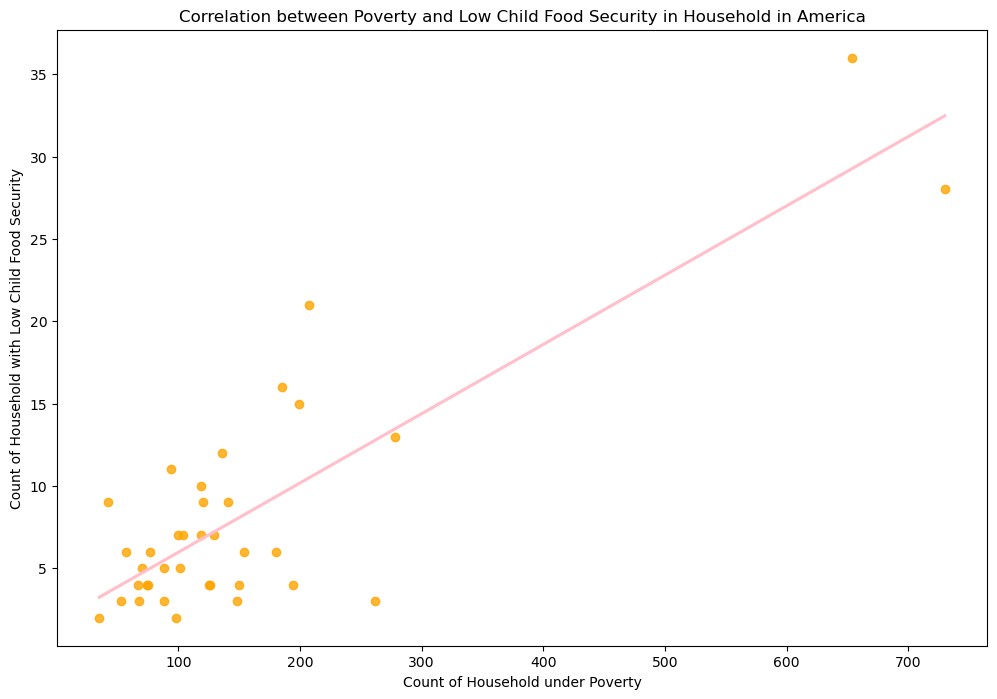

In [25]:
# create a scatter plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# scatterplot
sns.regplot(data= transformed_data, x='poverty_count', y='child_food_count', color='orange', ci=False, line_kws={'color':'pink'})

# title and axis labels
plt.title('Correlation between Poverty and Low Child Food Security in Household in America')
plt.xlabel("Count of Household under Poverty")
plt.ylabel("Count of Household with Low Child Food Security")

plt.savefig('Resources/Poverty and Low Child Food Security Scatter Plot.png')
plt.show()

In [ ]:
# bar plot